In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
import sklearn.metrics as metrics
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns

from sklearn import ensemble
from sklearn import model_selection
from sklearn import preprocessing


from sklearn import linear_model



%matplotlib inline

In [3]:
path_train ="../input/home-data-for-ml-course/train.csv"
path_test = "../input/home-data-for-ml-course/test.csv"

In [4]:
df_train1 = pd.read_csv(path_train)
df_test1 =  pd.read_csv(path_test)

In [5]:
(df_train1.head())


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df_train1["train"] =1
df_test1["train"] =0
df=pd.concat([df_train1 ,df_test1],axis=0,sort=False)

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [9]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

Data Visualization

In [10]:
#deleting columns with maximum no of NaN values
print("Columns \t missing ")
print(30*"=")
for column in df.columns:
    percentage_col = (df[column].isnull().sum()/len(df))*100
    print('{}\t{} % '.format(column.ljust(15,' '), round(percentage_col, 3)))
    

Columns 	 missing 
Id             	0.0 % 
MSSubClass     	0.0 % 
MSZoning       	0.137 % 
LotFrontage    	16.65 % 
LotArea        	0.0 % 
Street         	0.0 % 
Alley          	93.217 % 
LotShape       	0.0 % 
LandContour    	0.0 % 
Utilities      	0.069 % 
LotConfig      	0.0 % 
LandSlope      	0.0 % 
Neighborhood   	0.0 % 
Condition1     	0.0 % 
Condition2     	0.0 % 
BldgType       	0.0 % 
HouseStyle     	0.0 % 
OverallQual    	0.0 % 
OverallCond    	0.0 % 
YearBuilt      	0.0 % 
YearRemodAdd   	0.0 % 
RoofStyle      	0.0 % 
RoofMatl       	0.0 % 
Exterior1st    	0.034 % 
Exterior2nd    	0.034 % 
MasVnrType     	0.822 % 
MasVnrArea     	0.788 % 
ExterQual      	0.0 % 
ExterCond      	0.0 % 
Foundation     	0.0 % 
BsmtQual       	2.775 % 
BsmtCond       	2.809 % 
BsmtExposure   	2.809 % 
BsmtFinType1   	2.706 % 
BsmtFinSF1     	0.034 % 
BsmtFinType2   	2.741 % 
BsmtFinSF2     	0.034 % 
BsmtUnfSF      	0.034 % 
TotalBsmtSF    	0.034 % 
Heating        	0.0 % 
HeatingQC      	0.0 % 
Cen

In [11]:
x= ["MiscFeature","Fence","PoolQC","Alley"]
df.drop(x,axis=1,inplace=True)

In [12]:
def data_plot (x  ):
    df[x].value_counts().plot( kind="bar",figsize=[10,3])
    
    

None


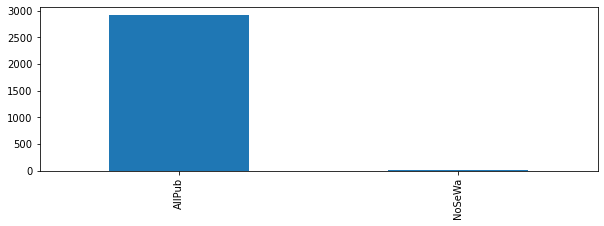

In [13]:
print(data_plot("Utilities" ))


None


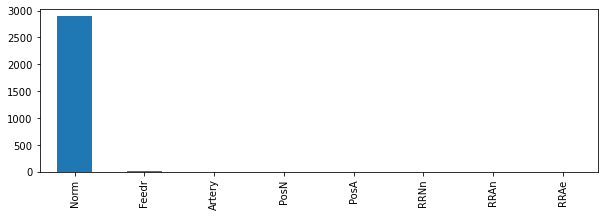

In [14]:
print(data_plot("Condition2"))

None


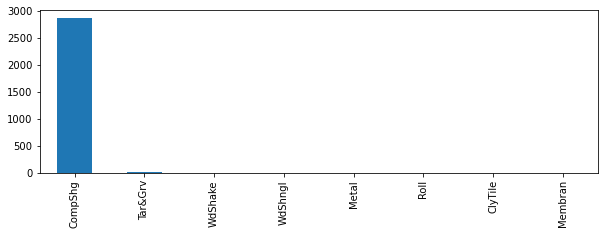

In [15]:
print(data_plot("RoofMatl"))

None


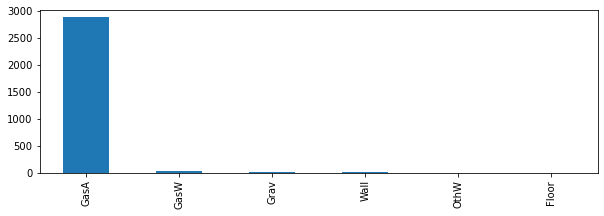

In [16]:
print(data_plot("Heating"))

In [17]:
df.PoolArea.value_counts()

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fcc43abc910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fcc43ac43d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fcc43abc410>],
 'medians': [<matplotlib.lines.Line2D at 0x7fcc43ac4e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fcc43aca410>],
 'means': []}

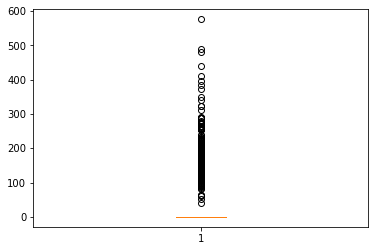

In [18]:
plt.boxplot(df.ScreenPorch)

None


Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

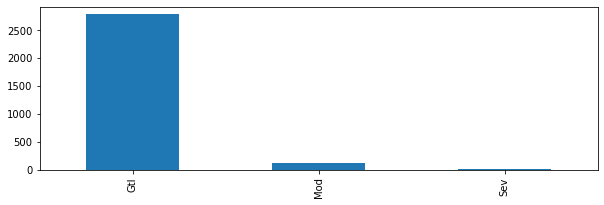

In [19]:
print(data_plot("LandSlope"))
df.LandSlope.value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64


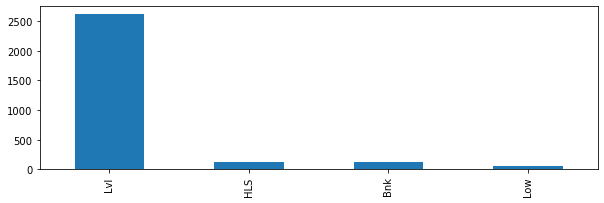

In [20]:
print(df.LandContour.value_counts())
data_plot("LandContour")

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

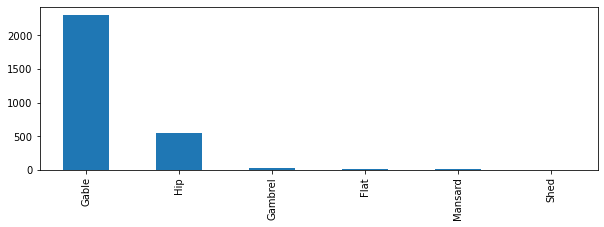

In [21]:
data_plot("RoofStyle")
df.RoofStyle.value_counts()

In [22]:
df.ScreenPorch.value_counts()

0      2663
144      13
192      11
168      10
120       9
216       8
180       7
200       7
160       6
224       6
100       5
288       4
225       4
156       4
126       4
189       4
153       4
155       4
182       3
161       3
256       3
142       3
147       3
115       3
112       3
195       3
90        3
210       3
175       3
145       2
259       2
165       2
116       2
170       2
322       2
176       2
255       2
266       2
92        2
184       2
240       2
196       2
198       2
204       2
227       2
110       2
138       2
108       2
95        2
140       2
154       1
40        1
60        1
64        1
122       1
128       1
130       1
80        1
84        1
190       1
208       1
162       1
104       1
178       1
88        1
94        1
148       1
174       1
150       1
166       1
152       1
164       1
385       1
220       1
222       1
117       1
119       1
121       1
123       1
135       1
141       1
143       1
163       1
171 

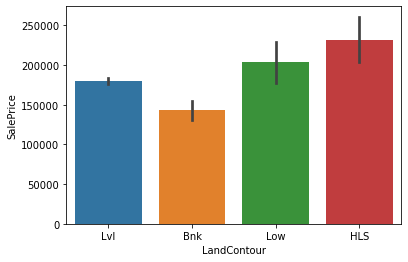

In [23]:
sns.barplot(x="LandContour",y="SalePrice",data=df)

In [24]:
outliers = ["RoofMatl","Utilities","Condition2","Heating","Street","LandSlope"]

In [25]:
df.drop(outliers, axis =1, inplace=True)

In [26]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000.0,1


In [27]:
object_col = df.select_dtypes(include=["object"])
num_col  = df.select_dtypes(exclude=["object"])

In [28]:
object1=object_col.copy()
num1 =num_col.copy()

# categorical features

In [29]:
print(' column \t object_col  ')   #percentage of missing values
print('='*30)
for col in object_col.columns:
    percentage_col = (object_col[col].isnull().sum()/len(object_col))*100
    
    print("{}\t{}".format(col.ljust(15," "),round(percentage_col,3)))

 column 	 object_col  
MSZoning       	0.137
LotShape       	0.0
LandContour    	0.0
LotConfig      	0.0
Neighborhood   	0.0
Condition1     	0.0
BldgType       	0.0
HouseStyle     	0.0
RoofStyle      	0.0
Exterior1st    	0.034
Exterior2nd    	0.034
MasVnrType     	0.822
ExterQual      	0.0
ExterCond      	0.0
Foundation     	0.0
BsmtQual       	2.775
BsmtCond       	2.809
BsmtExposure   	2.809
BsmtFinType1   	2.706
BsmtFinType2   	2.741
HeatingQC      	0.0
CentralAir     	0.0
Electrical     	0.034
KitchenQual    	0.034
Functional     	0.069
FireplaceQu    	48.647
GarageType     	5.379
GarageFinish   	5.447
GarageQual     	5.447
GarageCond     	5.447
PavedDrive     	0.0
SaleType       	0.034
SaleCondition  	0.0


In [30]:
columns_None = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
object1[columns_None]= object1[columns_None].fillna('None')

In [31]:
for col in object1:
    x=object1[col].mode()
    object1[col]=object1[col].fillna("x")

In [32]:
print(' column \t object_col  ')   #percentage of missing values
print('='*30)
for col in object1.columns:
    percentage_col = (object1[col].isnull().sum()/len(object1))*100
    
    print("{}\t{}".format(col.ljust(15," "),round(percentage_col,3)))

 column 	 object_col  
MSZoning       	0.0
LotShape       	0.0
LandContour    	0.0
LotConfig      	0.0
Neighborhood   	0.0
Condition1     	0.0
BldgType       	0.0
HouseStyle     	0.0
RoofStyle      	0.0
Exterior1st    	0.0
Exterior2nd    	0.0
MasVnrType     	0.0
ExterQual      	0.0
ExterCond      	0.0
Foundation     	0.0
BsmtQual       	0.0
BsmtCond       	0.0
BsmtExposure   	0.0
BsmtFinType1   	0.0
BsmtFinType2   	0.0
HeatingQC      	0.0
CentralAir     	0.0
Electrical     	0.0
KitchenQual    	0.0
Functional     	0.0
FireplaceQu    	0.0
GarageType     	0.0
GarageFinish   	0.0
GarageQual     	0.0
GarageCond     	0.0
PavedDrive     	0.0
SaleType       	0.0
SaleCondition  	0.0


In [33]:
label_encoder= preprocessing.LabelEncoder()
for feature in object1:
    encoded =label_encoder.fit_transform(object1[feature])
    object1[feature+"_Encoded"]=encoded

In [34]:
object2=object1.select_dtypes(include=object)
columns=[]
for col in object2:
    columns.append(col)
object1.drop(object1[columns],axis=1,inplace=True)
object1.head()


,MSZoning_Encoded,LotShape_Encoded,LandContour_Encoded,LotConfig_Encoded,Neighborhood_Encoded,Condition1_Encoded,BldgType_Encoded,HouseStyle_Encoded,RoofStyle_Encoded,Exterior1st_Encoded,Exterior2nd_Encoded,MasVnrType_Encoded,ExterQual_Encoded,ExterCond_Encoded,Foundation_Encoded,BsmtQual_Encoded,BsmtCond_Encoded,BsmtExposure_Encoded,BsmtFinType1_Encoded,BsmtFinType2_Encoded,HeatingQC_Encoded,CentralAir_Encoded,Electrical_Encoded,KitchenQual_Encoded,Functional_Encoded,FireplaceQu_Encoded,GarageType_Encoded,GarageFinish_Encoded,GarageQual_Encoded,GarageCond_Encoded,PavedDrive_Encoded,SaleType_Encoded,SaleCondition_Encoded
0,3,3,3,4,5,2,0,5,1,12,13,1,2,4,2,2,4,3,2,6,0,1,4,2,6,3,1,2,5,5,2,8,4
1,3,3,3,2,24,1,0,2,1,8,8,2,3,4,1,2,4,1,0,6,0,1,4,3,6,5,1,2,5,5,2,8,4
2,3,0,3,4,5,2,0,5,1,12,13,1,2,4,2,2,4,2,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4
3,3,0,3,0,6,2,0,5,1,13,15,2,3,4,0,4,1,3,0,6,2,1,4,2,6,2,5,3,5,5,2,8,0
4,3,0,3,2,15,2,0,5,1,12,13,1,2,4,2,2,4,0,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4


In [35]:
object1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   MSZoning_Encoded       2919 non-null   int64
 1   LotShape_Encoded       2919 non-null   int64
 2   LandContour_Encoded    2919 non-null   int64
 3   LotConfig_Encoded      2919 non-null   int64
 4   Neighborhood_Encoded   2919 non-null   int64
 5   Condition1_Encoded     2919 non-null   int64
 6   BldgType_Encoded       2919 non-null   int64
 7   HouseStyle_Encoded     2919 non-null   int64
 8   RoofStyle_Encoded      2919 non-null   int64
 9   Exterior1st_Encoded    2919 non-null   int64
 10  Exterior2nd_Encoded    2919 non-null   int64
 11  MasVnrType_Encoded     2919 non-null   int64
 12  ExterQual_Encoded      2919 non-null   int64
 13  ExterCond_Encoded      2919 non-null   int64
 14  Foundation_Encoded     2919 non-null   int64
 15  BsmtQual_Encoded       2919 non-null  

In [36]:
object2 =object1.copy()

# Numerical features

In [37]:
print(' column \t object_col  ')   #percentage of missing values
print('='*30)
for col in num1.columns:
    percentage_col = (num1[col].isnull().sum()/len(num1))*100
    
    print("{}\t{}".format(col.ljust(15," "),round(percentage_col,3)))

 column 	 object_col  
Id             	0.0
MSSubClass     	0.0
LotFrontage    	16.65
LotArea        	0.0
OverallQual    	0.0
OverallCond    	0.0
YearBuilt      	0.0
YearRemodAdd   	0.0
MasVnrArea     	0.788
BsmtFinSF1     	0.034
BsmtFinSF2     	0.034
BsmtUnfSF      	0.034
TotalBsmtSF    	0.034
1stFlrSF       	0.0
2ndFlrSF       	0.0
LowQualFinSF   	0.0
GrLivArea      	0.0
BsmtFullBath   	0.069
BsmtHalfBath   	0.069
FullBath       	0.0
HalfBath       	0.0
BedroomAbvGr   	0.0
KitchenAbvGr   	0.0
TotRmsAbvGrd   	0.0
Fireplaces     	0.0
GarageYrBlt    	5.447
GarageCars     	0.034
GarageArea     	0.034
WoodDeckSF     	0.0
OpenPorchSF    	0.0
EnclosedPorch  	0.0
3SsnPorch      	0.0
ScreenPorch    	0.0
PoolArea       	0.0
MiscVal        	0.0
MoSold         	0.0
YrSold         	0.0
SalePrice      	49.983
train          	0.0


In [38]:
num.info()

NameError: name 'num' is not defined

In [39]:
mode_value=num_col["LotFrontage"].mode()   

In [40]:
num=num_col["LotFrontage"].fillna(mode_value)    #filling with the most frequent value

In [41]:
num= num_col.fillna(0)       #filling rest columns with zeros

In [42]:
print(' column \t object_col  ')     #cross verification of  numerical features 
print('='*40)
for col in num.columns:
    percentage_num = (num[col].isnull().sum()/len(num))*100
    
    print('{}\t{} % '.format(col.ljust(15,' '), round(percentage_num, 3)))

 column 	 object_col  
Id             	0.0 % 
MSSubClass     	0.0 % 
LotFrontage    	0.0 % 
LotArea        	0.0 % 
OverallQual    	0.0 % 
OverallCond    	0.0 % 
YearBuilt      	0.0 % 
YearRemodAdd   	0.0 % 
MasVnrArea     	0.0 % 
BsmtFinSF1     	0.0 % 
BsmtFinSF2     	0.0 % 
BsmtUnfSF      	0.0 % 
TotalBsmtSF    	0.0 % 
1stFlrSF       	0.0 % 
2ndFlrSF       	0.0 % 
LowQualFinSF   	0.0 % 
GrLivArea      	0.0 % 
BsmtFullBath   	0.0 % 
BsmtHalfBath   	0.0 % 
FullBath       	0.0 % 
HalfBath       	0.0 % 
BedroomAbvGr   	0.0 % 
KitchenAbvGr   	0.0 % 
TotRmsAbvGrd   	0.0 % 
Fireplaces     	0.0 % 
GarageYrBlt    	0.0 % 
GarageCars     	0.0 % 
GarageArea     	0.0 % 
WoodDeckSF     	0.0 % 
OpenPorchSF    	0.0 % 
EnclosedPorch  	0.0 % 
3SsnPorch      	0.0 % 
ScreenPorch    	0.0 % 
PoolArea       	0.0 % 
MiscVal        	0.0 % 
MoSold         	0.0 % 
YrSold         	0.0 % 
SalePrice      	0.0 % 
train          	0.0 % 


In [43]:
num["Total_bath"]=num["FullBath"]+(num["HalfBath"]*0.5)
num["Total_basebath"]=num["BsmtFullBath"]+(num["BsmtHalfBath"]*0.5)

In [44]:
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Total_bath,Total_basebath
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,1,2.5,1.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,1,2.0,0.5
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,1,2.5,1.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,1,1.0,1.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,1,2.5,1.0


In [45]:
num.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath"],axis=1,inplace=True)

0       2879
80         4
205        2
360        2
390        1
384        1
362        1
312        1
234        1
232        1
420        1
156        1
144        1
140        1
120        1
114        1
108        1
392        1
697        1
515        1
371        1
513        1
481        1
479        1
473        1
431        1
397        1
259        1
450        1
53         1
1064       1
572        1
528        1
514        1
512        1
436        1
Name: LowQualFinSF, dtype: int64


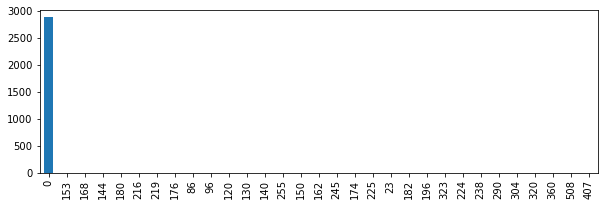

In [46]:
print(df.LowQualFinSF.value_counts())
data_plot("3SsnPorch")

In [47]:
num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Total_bath,Total_basebath
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,1,2.5,1.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,1,2.0,0.5
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,1,2.5,1.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,1,1.0,1.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,1,2.5,1.0


In [48]:
corr_matrix =num_col.corr()
corr_matrix["SalePrice"].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [49]:
final = pd.concat([object1, num], axis=1,sort=False)   #concating the object and numerical features.
final.head()

,MSZoning_Encoded,LotShape_Encoded,LandContour_Encoded,LotConfig_Encoded,Neighborhood_Encoded,Condition1_Encoded,BldgType_Encoded,HouseStyle_Encoded,RoofStyle_Encoded,Exterior1st_Encoded,Exterior2nd_Encoded,MasVnrType_Encoded,ExterQual_Encoded,ExterCond_Encoded,Foundation_Encoded,BsmtQual_Encoded,BsmtCond_Encoded,BsmtExposure_Encoded,BsmtFinType1_Encoded,BsmtFinType2_Encoded,HeatingQC_Encoded,CentralAir_Encoded,Electrical_Encoded,KitchenQual_Encoded,Functional_Encoded,FireplaceQu_Encoded,GarageType_Encoded,GarageFinish_Encoded,GarageQual_Encoded,GarageCond_Encoded,PavedDrive_Encoded,SaleType_Encoded,SaleCondition_Encoded,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,train,Total_bath,Total_basebath
0,3,3,3,4,5,2,0,5,1,12,13,1,2,4,2,2,4,3,2,6,0,1,4,2,6,3,1,2,5,5,2,8,4,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,1,2.5,1.0
1,3,3,3,2,24,1,0,2,1,8,8,2,3,4,1,2,4,1,0,6,0,1,4,3,6,5,1,2,5,5,2,8,4,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,1,2.0,0.5
2,3,0,3,4,5,2,0,5,1,12,13,1,2,4,2,2,4,2,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,1,2.5,1.0
3,3,0,3,0,6,2,0,5,1,13,15,2,3,4,0,4,1,3,0,6,2,1,4,2,6,2,5,3,5,5,2,8,0,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,1,1.0,1.0
4,3,0,3,2,15,2,0,5,1,12,13,1,2,4,2,2,4,0,2,6,0,1,4,2,6,5,1,2,5,5,2,8,4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,1,2.5,1.0


In [50]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   MSZoning_Encoded       2919 non-null   int64  
 1   LotShape_Encoded       2919 non-null   int64  
 2   LandContour_Encoded    2919 non-null   int64  
 3   LotConfig_Encoded      2919 non-null   int64  
 4   Neighborhood_Encoded   2919 non-null   int64  
 5   Condition1_Encoded     2919 non-null   int64  
 6   BldgType_Encoded       2919 non-null   int64  
 7   HouseStyle_Encoded     2919 non-null   int64  
 8   RoofStyle_Encoded      2919 non-null   int64  
 9   Exterior1st_Encoded    2919 non-null   int64  
 10  Exterior2nd_Encoded    2919 non-null   int64  
 11  MasVnrType_Encoded     2919 non-null   int64  
 12  ExterQual_Encoded      2919 non-null   int64  
 13  ExterCond_Encoded      2919 non-null   int64  
 14  Foundation_Encoded     2919 non-null   int64  
 15  Bsmt

In [51]:
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

In [52]:
sns.barplot(x=final.columns, y=ensemble.RandomForestClassifier().fit(preprocessing.StandardScaler().fit_transform(final),y).feature_importances_)
plt.xticks(rotation=45)
plt.axhline(y=0.05,c='yellow')
plt.axhline(y=0.1,c='orange')
plt.axhline(y=0.15,c='red')

sel_threshold = 0.00;


NameError: name 'y' is not defined

In [53]:
final = final.drop(['Id',],axis=1)

df_train = final[final['train'] == 1]
df_train = df_train.drop(['train',],axis=1)


df_test = final[final['train'] == 0]
df_test = df_test.drop(['SalePrice'],axis=1)
df_test = df_test.drop(['train',],axis=1)

In [54]:
target= df_train['SalePrice']
df_train = df_train.drop(['SalePrice'],axis=1)

In [55]:
#valid_fraction =0.1
valid_rows =int(len(df_train)*0.1)
train =df_train[:-valid_rows*2]
valid= df_train[-valid_rows*2:-valid_rows]
test=df_train[-valid_rows:]

In [56]:
x_train,x_test,y_train,y_test = train_test_split(df_train,target,random_state=0)

In [57]:
forest_model = RandomForestRegressor(n_estimators=450,random_state=1)
forest_model.fit(x_train, y_train)
preds = forest_model.predict(x_test)
print(mean_absolute_error(y_test, preds))
print('Root Mean Square Error test = ' + str(math.sqrt(metrics.mean_squared_error(y_test, preds))))

16723.604633181123
Root Mean Square Error test = 30423.288140961035


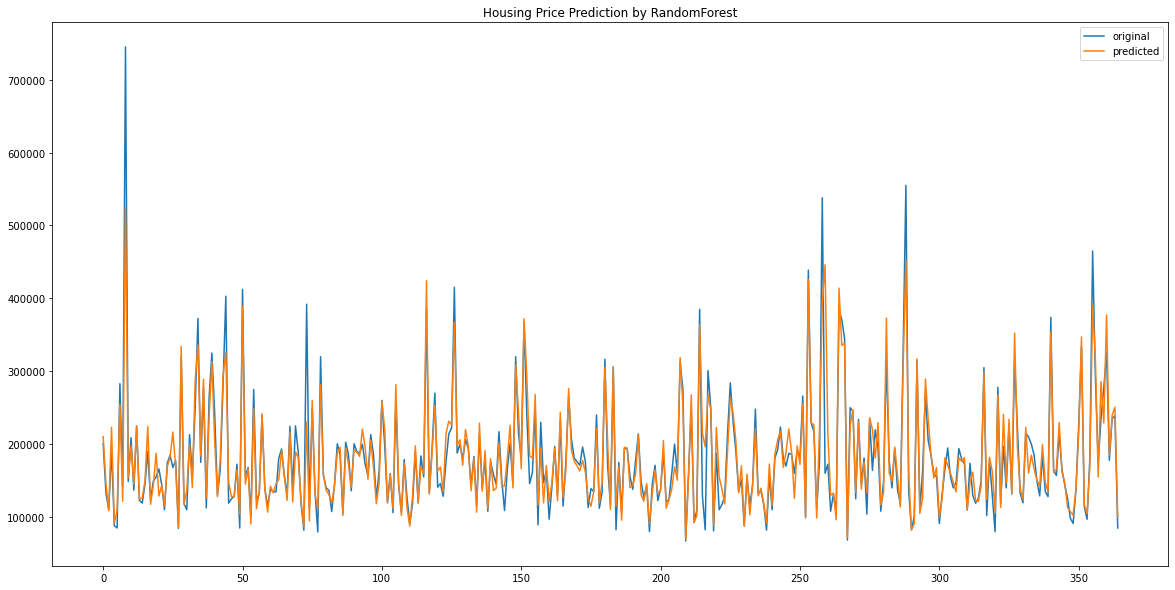

In [58]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, preds, label="predicted")
plt.title("Housing Price Prediction by RandomForest")
plt.legend()
plt.show()

In [59]:
forest_model.fit(df_train, target)
rf_val_predictions = forest_model.predict(df_test)

In [60]:
result = pd.DataFrame({"Id": df_test1["Id"],
        
        "SalePrice": rf_val_predictions
    })
result.to_csv('result.csv', index=False)

In [61]:
result.head()

,Id,SalePrice
0,1461,126016.146667
1,1462,155988.311111
2,1463,179465.260000
3,1464,181407.991111
4,1465,198556.466667
